<a href="https://colab.research.google.com/github/Mugangasia/NutriPal-Recipe-Recommendation-System-/blob/main/NutriPal_Recipe_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NutriPal Recipe Recommendation System

## Businesss Understanding

In the rapidly growing health and wellness industry, individuals are increasingly seeking effective solutions to make informed dietary choices and improve their overall well-being. However, navigating the vast array of diet plans, meal delivery services, and health apps can be overwhelming. Stakeholders in this industry face a critical challenge of providing personalized and accurate nutrition recommendations that meet the unique needs and preferences of individuals.

A significant problem is the lack of tailored nutrition guidance available in the market. Existing solutions often offer generic diet plans that do not consider individual factors such as age, gender, body composition, dietary restrictions, and cultural preferences. Consequently, individuals may experience frustration and disappointment when these solutions fail to deliver the desired results, leading to a decline in motivation and a higher likelihood of abandoning their healthy eating goals.

Furthermore, the fast-paced nature of modern lifestyles presents another obstacle. Many individuals struggle to find the time and energy required to research, plan, and prepare nutritious meals regularly. This often results in resorting to unhealthy eating habits, negatively impacting their overall health and well-being.

By providing accurate and personalized nutrition recommendations, stakeholders in the health and wellness industry can differentiate their offerings, enhance customer satisfaction, and foster long-term adherence to healthy eating habits. Additionally, the utilization of advanced technologies and user-friendly interfaces can create a competitive advantage and position stakeholders as leaders in the market.


## Problem Statement

The global prevalence of obesity and other diet-related chronic diseases is increasing. This is due in part to the increasing availability of unhealthy foods and the difficulty people have in making healthy food choices.

A food recommendations system could help people make healthier food choices by providing personalized recommendations based on their individual needs and preferences. This could help people improve their diet and reduce their risk of developing chronic diseases.

## Solution Statement

* ```Lack of personalized nutrition recommendations:``` Existing solutions often rely on generic dietary guidelines that are based on population-level data. This approach can be effective for some individuals, but it may not be optimal for everyone. For example, generic guidelines may not take into account an individual's genetic makeup, which can play a role in determining how their body responds to different foods. Additionally, generic guidelines may not be tailored to an individual's lifestyle or health goals. For example, someone who is trying to lose weight may need different recommendations than someone who is trying to manage a chronic disease. <br>

* ```Time and effort constraints for meal planning:``` Busy lifestyles can make it difficult for individuals to find the time and energy to plan and prepare healthy meals. This can be especially challenging for people who work long hours or have young children. Additionally, meal planning can be time-consuming and complex, especially if an individual has food allergies or intolerances.

## Objectives
# Main objective.

> Develop a Food/Recipe Recommendation System that suggests nutritious food to individuals and  promoting a healthy lifestyle.

## Specific Objectives.


*   Identify the key features and factors that impact an individual's overall health, and determine which ones should be incorporated into the food recommendation system.
*   Clean and preprocess the nutrition data available in the dataset, and combine it with external data sources to create a comprehensive nutrition database that can be used by the recommendation system.

*   Develop and implement recommendation algorithms that can generate personalized food recommendations based on the user's individual characteristics such as age, gender, degree of physical activity, locally available foods, and dietary customs.
*   Create a chatbot that can interact with users and collect relevant information such as dietary preferences, and restrictions, as well as any other relevant information that can be used to personalize food recommendations.

*   Integrate the recommendation algorithms and chatbot into a user-friendly and intuitive interface that allows users to easily access and interact with the system.
*   Deploy the food recommendation system and chatbot, and conduct user testing to gather feedback and identify areas for improvement.

## Metrics Of Success.
> Our recommender system will be considered successful if it meets the following criteria:

* Have a recall score of ```80%``` and above.
* Have a mean absolute precission at least ```90%```.
* Have a coverage of around 90%.This means that the model is able to recommend a wide variety of nutritious foods and recipes to users

## Data Understanding

This project will include 3 datasets

* **Recipes**

* **Nutrition**

* **Kenyan Local Food Recipes**

Recipes data set was obtained from [ here ](https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions). It countains a a list of 231636 rows of recipes and 12 columns.
*   name - Recipe name
*   id - Recipe ID
*   minutes - Minutes to prepare recipe
*   contributor_id - User ID who submitted this recipe
*   submitted - Date recipe was submitted
*   tags - Food.com tags for recipe
*   nutrition - Nutrition information (calories (#), total fat (PDV), sugar (PDV) ,sodium (PDV) , protein (PDV) , saturated fat (PDV) , and carbohydrates (PDV))
*   n_steps - Number of steps in recipe
*   steps - Text for recipe steps, in order
*   description - User-provided description
*   ingredients - List of ingredient names
*   n_ingredients - Number of ingredients



The nutrition dataset was obtained from [here](https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products).

This dataset contains information on approximately 8.8 thousand types of food. The dataset includes various features related to the nutrition value of each food item per 100gram serving. There are 75 features in total, you can find features like **calories**, **vitamin_d**, **zink**, **protein**, lactose. As you can see features names are very self-explanatory, so a description is not provided.

In [ ]:
#import the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Nutrition Dataset

In [ ]:
#loading the data
Nutrition = pd.read_csv('nutrition.csv')
Nutrition.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
#getting information on the Nutrition data set
Nutrition. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

$Inference$
* The Nutrition dataset ahs Object data types and numerical data types.
* The dataset has 8789 rows and 77 columns.

In [ ]:
# craeting data set with relevant features
Nutrition_df = Nutrition.loc[:, ['name','serving_size','calories','total_fat','saturated_fat','cholesterol','sodium','potassium']]


In [ ]:
#creating a function that strips and converts feautures to float type
def clean_df(df, col_name):
  # Create a copy of the input DataFrame to avoid modifying the original data
    cleaned_df = df.copy()

    # Strip whitespace characters and replace non-numeric characters with nothing
    cleaned_df[col_name] = cleaned_df[col_name].str.strip().replace('[^\d\.]', '', regex=True)

    # Convert the column to float data type
    cleaned_df[col_name] = pd.to_numeric(cleaned_df[col_name], errors='coerce').astype(float)

    return cleaned_df


In [ ]:
#cleaning all the columnns in the nutrition data frame.
cols_to_clean = [ 'serving_size','calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium','potassium' ]
for col in cols_to_clean:
  Nutrition_df[col] = Nutrition_df[col].astype(str)
  Nutrition_df = clean_df(Nutrition_df, col)

In [ ]:
Nutrition.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
# checking for % of missing values in the data set
Nutrition_df.isnull().sum()/len(Nutrition_df)*100

name              0.000000
serving_size      0.000000
calories          0.000000
total_fat         0.000000
saturated_fat    18.090795
cholesterol       0.000000
sodium            0.000000
potassium         0.000000
dtype: float64

$Inference$
> saturated_fat has 18.09% of missing values.

In [ ]:
#removing the null values
mean_value = Nutrition_df["saturated_fat"].mean()
Nutrition_df["saturated_fat"].fillna(mean_value,inplace=True)


In [ ]:
#checking for duplicates.
Nutrition_df.duplicated().sum()

0

$Inference$
> The Nutrition dataset has no duplicates.

# Recipe Dataset

In [ ]:
#loading the data
recipes = pd.read_csv('RAW_recipes.csv')
recipes.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


In [ ]:
#getting info of the recipes data set.
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


$Inference$
* The Recipe dataset has ```231636``` rows and ```12``` columns.
* The dataset has Object data types and float.

In [ ]:
# creating a new recipes data frame of the recipes dataset with the relevant features.
recipes_df = recipes.loc[:, ['id','name','minutes','nutrition','tags','ingredients','steps']]

In [ ]:
# Splitting the nutrition column into individual nutrient columns
recipes_df[['calories', 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']] = recipes['nutrition'].str.split(",", expand=True)

# Removing extra characters from specific columns
recipes_df['calories'] = recipes_df['calories'].str.replace('[', '')
recipes_df['carbohydrates (PDV)'] = recipes_df['carbohydrates (PDV)'].str.replace(']', '')


In [ ]:
#dropping the nutrition column
recipes_df.drop(['nutrition'],axis=1).head()

,id,name,minutes,tags,ingredients,steps,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,137739,arriba baked winter squash mexican style,55,"['60-minutes-or-less', 'time-to-make', 'course...","['winter squash', 'mexican seasoning', 'mixed ...","['make a choice and proceed with recipe', 'dep...",51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,31490,a bit different breakfast pizza,30,"['30-minutes-or-less', 'time-to-make', 'course...","['prepared pizza crust', 'sausage patty', 'egg...","['preheat oven to 425 degrees f', 'press dough...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,112140,all in the kitchen chili,130,"['time-to-make', 'course', 'preparation', 'mai...","['ground beef', 'yellow onions', 'diced tomato...","['brown ground beef in large pot', 'add choppe...",269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,59389,alouette potatoes,45,"['60-minutes-or-less', 'time-to-make', 'course...","['spreadable cheese with garlic and herbs', 'n...",['place potatoes in a large pot of lightly sal...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,44061,amish tomato ketchup for canning,190,"['weeknight', 'time-to-make', 'course', 'main-...","['tomato juice', 'apple cider vinegar', 'sugar...",['mix all ingredients& boil for 2 1 / 2 hours ...,352.9,1.0,337.0,23.0,3.0,0.0,28.0


In [ ]:
#cheching for missing values
missing_values = recipes_df.isnull().sum()
print(missing_values)

id                     0
name                   1
minutes                0
nutrition              0
tags                   0
ingredients            0
steps                  0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64


In [ ]:
#appling function columns to clean to all numerical columns .
cols_to_clean = [ 'calories',
       'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)', 'protein (PDV)',
       'saturated fat (PDV)', 'carbohydrates (PDV)' ]
for col in cols_to_clean:
  recipes_df[col] = recipes_df[col].astype(str)
  recipes_df = clean_df(recipes_df, col)

In [ ]:
#dropping all rows with missing values
recipes_df.dropna(inplace=True)

In [ ]:
#confirming there are no missing values
recipes_df.isnull().sum()

id                     0
name                   0
minutes                0
nutrition              0
tags                   0
ingredients            0
steps                  0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

In [ ]:
#confirming the data columns has been cleaned
recipes_df.head()

,id,name,minutes,nutrition,tags,ingredients,steps,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,137739,arriba baked winter squash mexican style,55,"[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]","['60-minutes-or-less', 'time-to-make', 'course...","['winter squash', 'mexican seasoning', 'mixed ...","['make a choice and proceed with recipe', 'dep...",51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,31490,a bit different breakfast pizza,30,"[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]","['30-minutes-or-less', 'time-to-make', 'course...","['prepared pizza crust', 'sausage patty', 'egg...","['preheat oven to 425 degrees f', 'press dough...",173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,112140,all in the kitchen chili,130,"[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]","['time-to-make', 'course', 'preparation', 'mai...","['ground beef', 'yellow onions', 'diced tomato...","['brown ground beef in large pot', 'add choppe...",269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,59389,alouette potatoes,45,"[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]","['60-minutes-or-less', 'time-to-make', 'course...","['spreadable cheese with garlic and herbs', 'n...",['place potatoes in a large pot of lightly sal...,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,44061,amish tomato ketchup for canning,190,"[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]","['weeknight', 'time-to-make', 'course', 'main-...","['tomato juice', 'apple cider vinegar', 'sugar...",['mix all ingredients& boil for 2 1 / 2 hours ...,352.9,1.0,337.0,23.0,3.0,0.0,28.0


# Kenyan Local Food Recipes Dataset

In [ ]:
recipe_ke = pd.read_csv('Kenyan_recipe.csv')

In [ ]:
recipe_ke.head()

,name,minutes,ingredients,steps,Serving,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,Ugali and omena,30,Maize flour\nOmena\nOil\n3 chopped tomatoes\nC...,Step 1\nBoil 3 cups of water add maize flour s...,4.0,205.0,30.0,203.0,29.0,192.0,172.0,182.0
1,Kienyeji fried,25,1 table spoon salt\n2 table spoon cooking vege...,Asemble the vegetables.\nPluck leaves from the...,1.0,135.0,173.0,247.0,196.0,87.0,200.0,239.0
2,dengu Chapati,30,Ndengu\ncubes congets diced in\ncubes carrots ...,Step 1\nSteam the mince meat and add oil then ...,4.0,493.0,211.0,131.0,260.0,84.0,75.0,275.0
3,Ugali matumbo ft african salad,60,400 g Maize flour \n20 g Onions \n11/2 kgMatum...,"Step 1 Bring the water to boil, add the maize ...",4.0,94.0,259.0,71.0,255.0,205.0,20.0,57.0
4,Chicken stew,60,Boiled chicken\n2 Red onion\n1 Spring onion\n4...,Step 1Boil 1 diced potato and 1 diced carrot\...,2.0,13.0,35.0,221.0,109.0,219.0,210.0,125.0


In [ ]:
recipe_ke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 211 non-null    object 
 1   minutes              211 non-null    object 
 2   ingredients          210 non-null    object 
 3   steps                208 non-null    object 
 4   Serving              216 non-null    float64
 5   calories             218 non-null    float64
 6   total fat (PDV)      218 non-null    float64
 7   sugar (PDV)          218 non-null    float64
 8   sodium (PDV)         218 non-null    float64
 9   protein (PDV)        218 non-null    float64
 10  saturated fat (PDV)  218 non-null    float64
 11  carbohydrates (PDV)  218 non-null    float64
dtypes: float64(8), object(4)
memory usage: 20.6+ KB


In [ ]:
#checking for % missing values
recipe_ke.isnull().sum()/len(recipe_ke)*100

name                   3.211009
minutes                3.211009
ingredients            3.669725
steps                  4.587156
Serving                0.917431
calories               0.000000
total fat (PDV)        0.000000
sugar (PDV)            0.000000
sodium (PDV)           0.000000
protein (PDV)          0.000000
saturated fat (PDV)    0.000000
carbohydrates (PDV)    0.000000
dtype: float64

<AxesSubplot:>

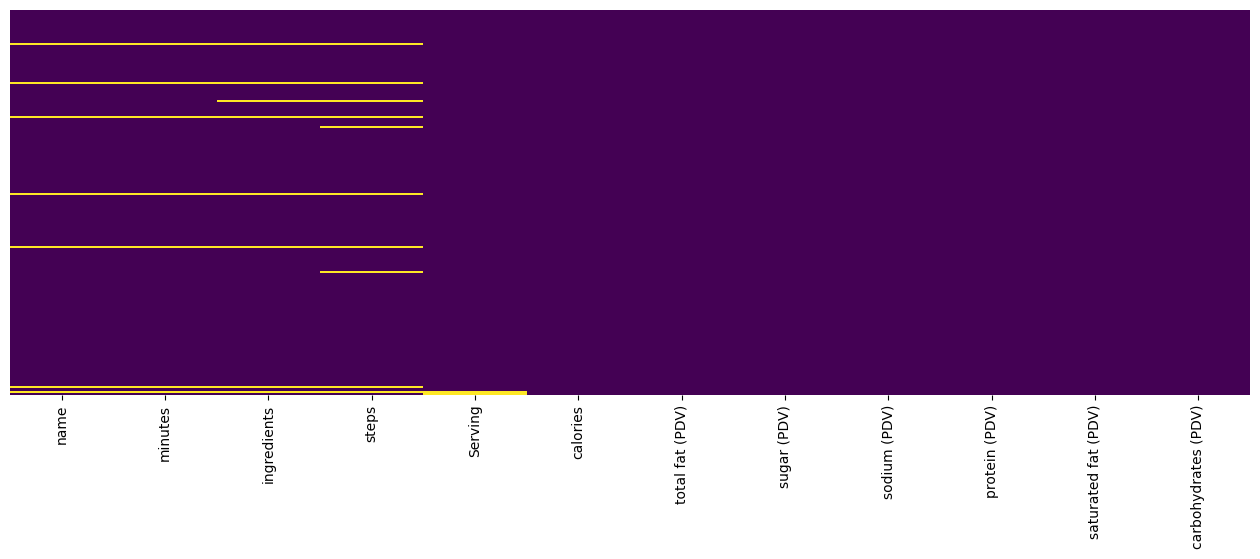

In [ ]:
# checking for null values Visualization
fig, ax = plt.subplots(figsize=(16,5))
sns.heatmap(recipe_ke.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#dropping the null values
recipe_ke.dropna(inplace=True)

In [ ]:
#CHecking for Duplicates
recipe_ke.duplicated().sum()

0

In [ ]:
# Iterate over each row in the DataFrame
for index, row in recipe_ke.iterrows():
    # Replace '\n' with comma in 'ingredients' column
    ingredients = row['ingredients']
    if isinstance(ingredients, str):
        ingredients = ingredients.replace('\n', ',')
        recipe_ke.at[index, 'ingredients'] = ingredients

    # Replace '\n' with comma in 'steps' column
    steps = row['steps']
    if isinstance(steps, str):
        steps = steps.replace('\n', ',')
        recipe_ke.at[index, 'steps'] = steps

# Display the updated DataFrame
recipe_ke.head()

,name,minutes,ingredients,steps,Serving,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
0,Ugali and omena,30,"Maize flour,Omena,Oil,3 chopped tomatoes,Chopp...","Step 1,Boil 3 cups of water add maize flour st...",4.0,205.0,30.0,203.0,29.0,192.0,172.0,182.0
1,Kienyeji fried,25,"1 table spoon salt,2 table spoon cooking veget...","Asemble the vegetables.,Pluck leaves from the ...",1.0,135.0,173.0,247.0,196.0,87.0,200.0,239.0
2,dengu Chapati,30,"Ndengu,cubes congets diced in,cubes carrots in...","Step 1,Steam the mince meat and add oil then o...",4.0,493.0,211.0,131.0,260.0,84.0,75.0,275.0
3,Ugali matumbo ft african salad,60,"400 g Maize flour ,20 g Onions ,11/2 kgMatumbo...","Step 1 Bring the water to boil, add the maize ...",4.0,94.0,259.0,71.0,255.0,205.0,20.0,57.0
4,Chicken stew,60,"Boiled chicken,2 Red onion,1 Spring onion,4 To...","Step 1Boil 1 diced potato and 1 diced carrot,...",2.0,13.0,35.0,221.0,109.0,219.0,210.0,125.0


### Exploratory Data Analysis.

In [ ]:
#descriptive statistics for nutrition data set.
Nutrition_df.describe()

,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,potassium
count,8789.0,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000,8789.000000
mean,100.0,226.283878,10.556855,4.192791,38.723063,306.353851,265.251223
std,0.0,169.862001,15.818247,6.223870,117.358944,939.220468,371.443524
min,100.0,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000
25%,100.0,91.000000,1.000000,1.000000,0.000000,36.000000,111.000000
50%,100.0,191.000000,5.100000,3.200000,2.000000,84.000000,219.000000
75%,100.0,337.000000,14.000000,4.200000,65.000000,396.000000,329.000000
max,100.0,902.000000,100.000000,96.000000,3100.000000,38758.000000,16500.000000


The descriptive statistics for the nutrition dataset show that the mean serving size is 100 grams, the mean number of calories is 226, and the standard deviation for calories is 169. This indicates that the distribution of calories is skewed to the right, with a few foods having a high number of calories.

In [ ]:
#descriptive statistics for recipes data set.
recipes_df.describe()

,id,minutes,calories,total fat (PDV),sugar (PDV),sodium (PDV),protein (PDV),saturated fat (PDV),carbohydrates (PDV)
count,231636.000000,2.316360e+05,231636.000000,231636.00000,231636.00000,231636.000000,231636.000000,231636.000000,231636.000000
mean,222014.077639,9.398587e+03,473.937580,36.07978,84.29656,30.147615,34.682001,45.588864,15.560409
std,141206.613497,4.461973e+06,1189.711657,77.79775,800.08261,131.961859,58.472567,98.235873,81.824736
min,38.000000,0.000000e+00,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,99943.750000,2.000000e+01,174.375000,8.00000,9.00000,5.000000,7.000000,7.000000,4.000000
50%,207248.500000,4.000000e+01,313.400000,20.00000,25.00000,14.000000,18.000000,23.000000,9.000000
75%,333815.250000,6.500000e+01,519.700000,41.00000,68.00000,33.000000,51.000000,52.000000,16.000000
max,537716.000000,2.147484e+09,434360.200000,17183.00000,362729.00000,29338.000000,6552.000000,10395.000000,36098.000000


### Nutrition Data set

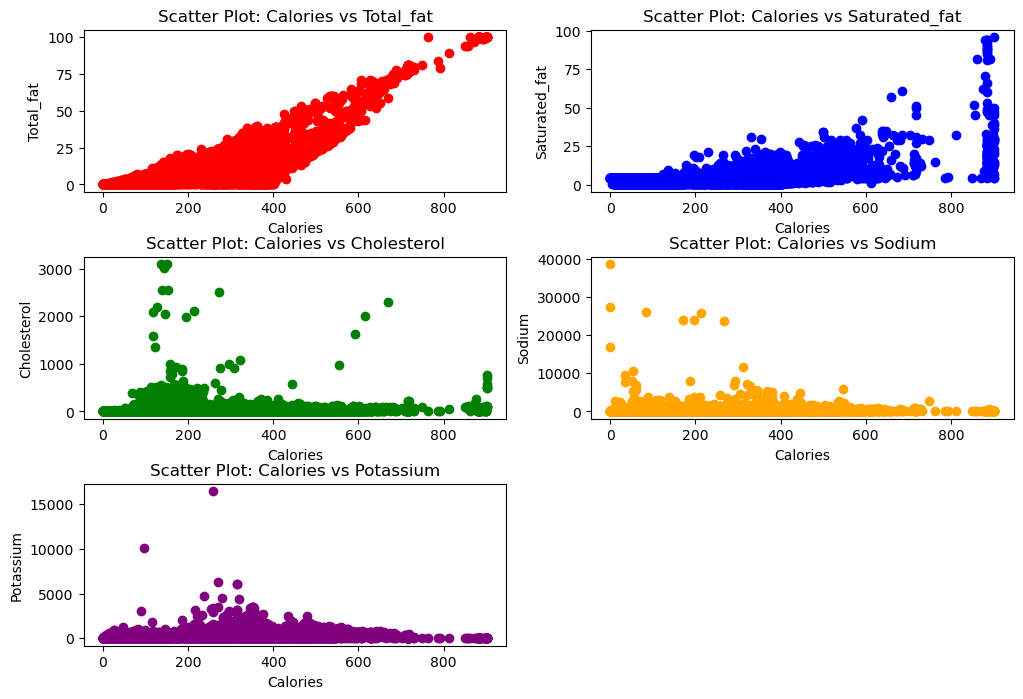

In [ ]:
# Define the columns and colors
columns = ['total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'potassium']
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Determine the dimensions of the subplot grid
num_plots = len(columns)
num_cols = 2
num_rows = (num_plots + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

# Iterate over columns and colors
for i, (column, color) in enumerate(zip(columns, colors)):
    # Calculate the subplot position
    row = i // num_cols
    col = i % num_cols

    # Scatter plot: calories vs current column
    axes[row, col].scatter(Nutrition_df['calories'], Nutrition_df[column], color=color)
    axes[row, col].set_xlabel('Calories')
    axes[row, col].set_ylabel(column.capitalize())
    axes[row, col].set_title(f'Scatter Plot: Calories vs {column.capitalize()}')

# Hide unused subplots
for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

# Display the plots
plt.show()

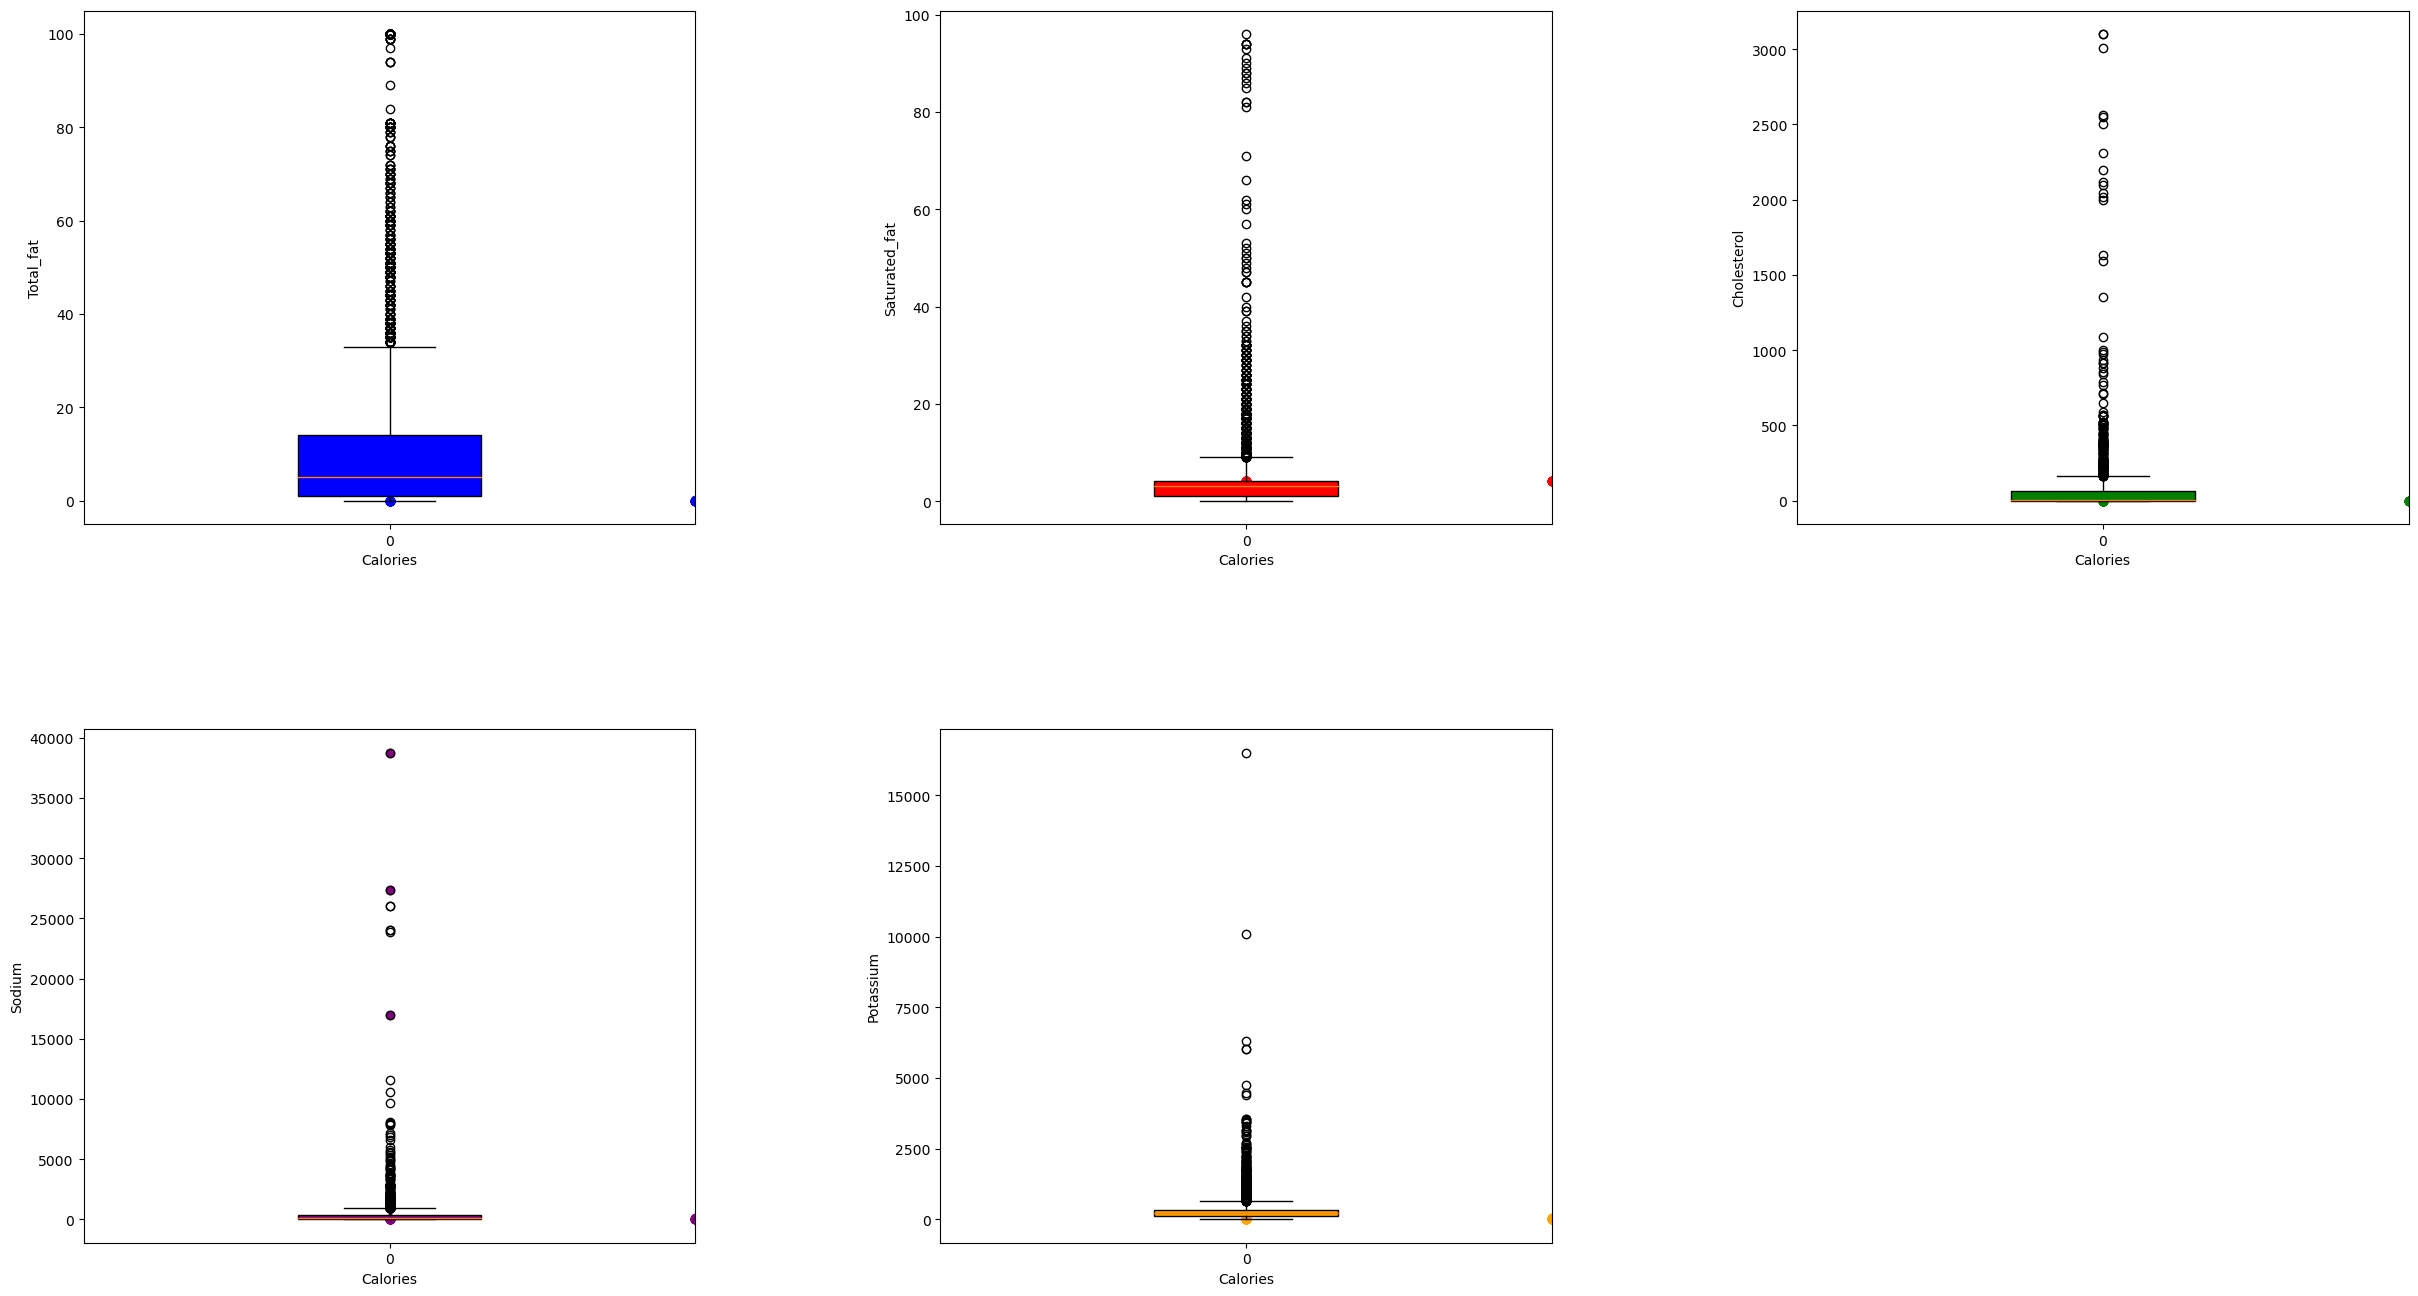

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(30, 16))
nutrient_cols = ['total_fat', 'saturated_fat', 'cholesterol', 'sodium', 'potassium']

# Flatten the axes array to iterate over it in a 1D fashion
axs = axs.flatten()

# Define a color palette for the plots
colors = ['blue', 'red', 'green', 'purple', 'orange']

# Loop over each nutrient column to create a box plot
for i, col in enumerate(nutrient_cols):
    # Scatter plot
    axs[i].scatter(Nutrition_df['calories'], Nutrition_df[col], color=colors[i])
    axs[i].set_xlabel('Calories')
    axs[i].set_ylabel(col.capitalize())

    # Box plot
    boxplot_dict = axs[i].boxplot(Nutrition_df[col], positions=[0], patch_artist=True, widths=0.6)

    # Set the box plot's color to match the scatter plot
    for patch in boxplot_dict['boxes']:
        patch.set_facecolor(colors[i])

    # Set the x-axis limits to center the box plot
    axs[i].set_xlim(-1, 1)

# Remove any unused axes
for ax in axs[5:]:
    ax.remove()

# Adjust the spacing between the plots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plots
plt.show()

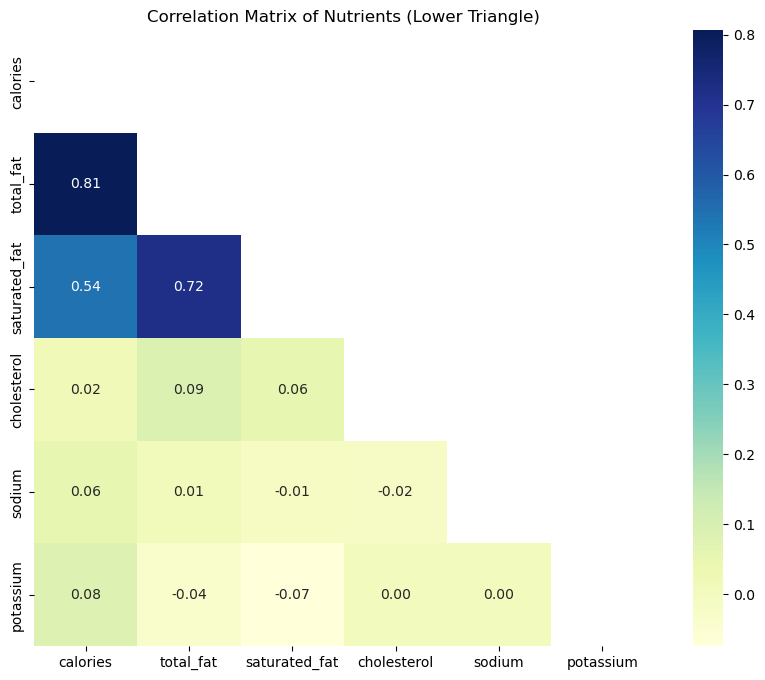

In [ ]:

# Calculate the correlation matrix
correlation_matrix = nutrients.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", mask=mask)
plt.title('Correlation Matrix of Nutrients (Lower Triangle)')
plt.show()

- The most significant correlation exists between the quantity of food and the total fat content in it.
- When individuals aim to decrease their calorie intake, they should steer clear of foods that have high levels of total fat.
- Foods with high amounts of total fat should be avoided by individuals seeking to reduce their calorie consumption.
- If a user wants to lower their calorie intake, it is essential for them to refrain from consuming foods that contain high levels of total fat.
- To achieve a reduction in calorie intake, individuals should make it a priority to exclude foods that are rich in total fat from their diet.

### Recipes dataset

In [ ]:
# getting the recipes random sample.
recipes_sample_df = recipes_df.sample(n=2000, random_state=42)

In [ ]:
#confirming number of missing values
recipes_df.isnull().sum()

id                     0
name                   0
minutes                0
nutrition              0
tags                   0
ingredients            0
steps                  0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

In [ ]:
# getting numerical columns
num_cols = recipes_df.select_dtypes(exclude = ['object'])

In [ ]:
#checking for maximum value for calories
recipes_df['calories'].max()

434360.2

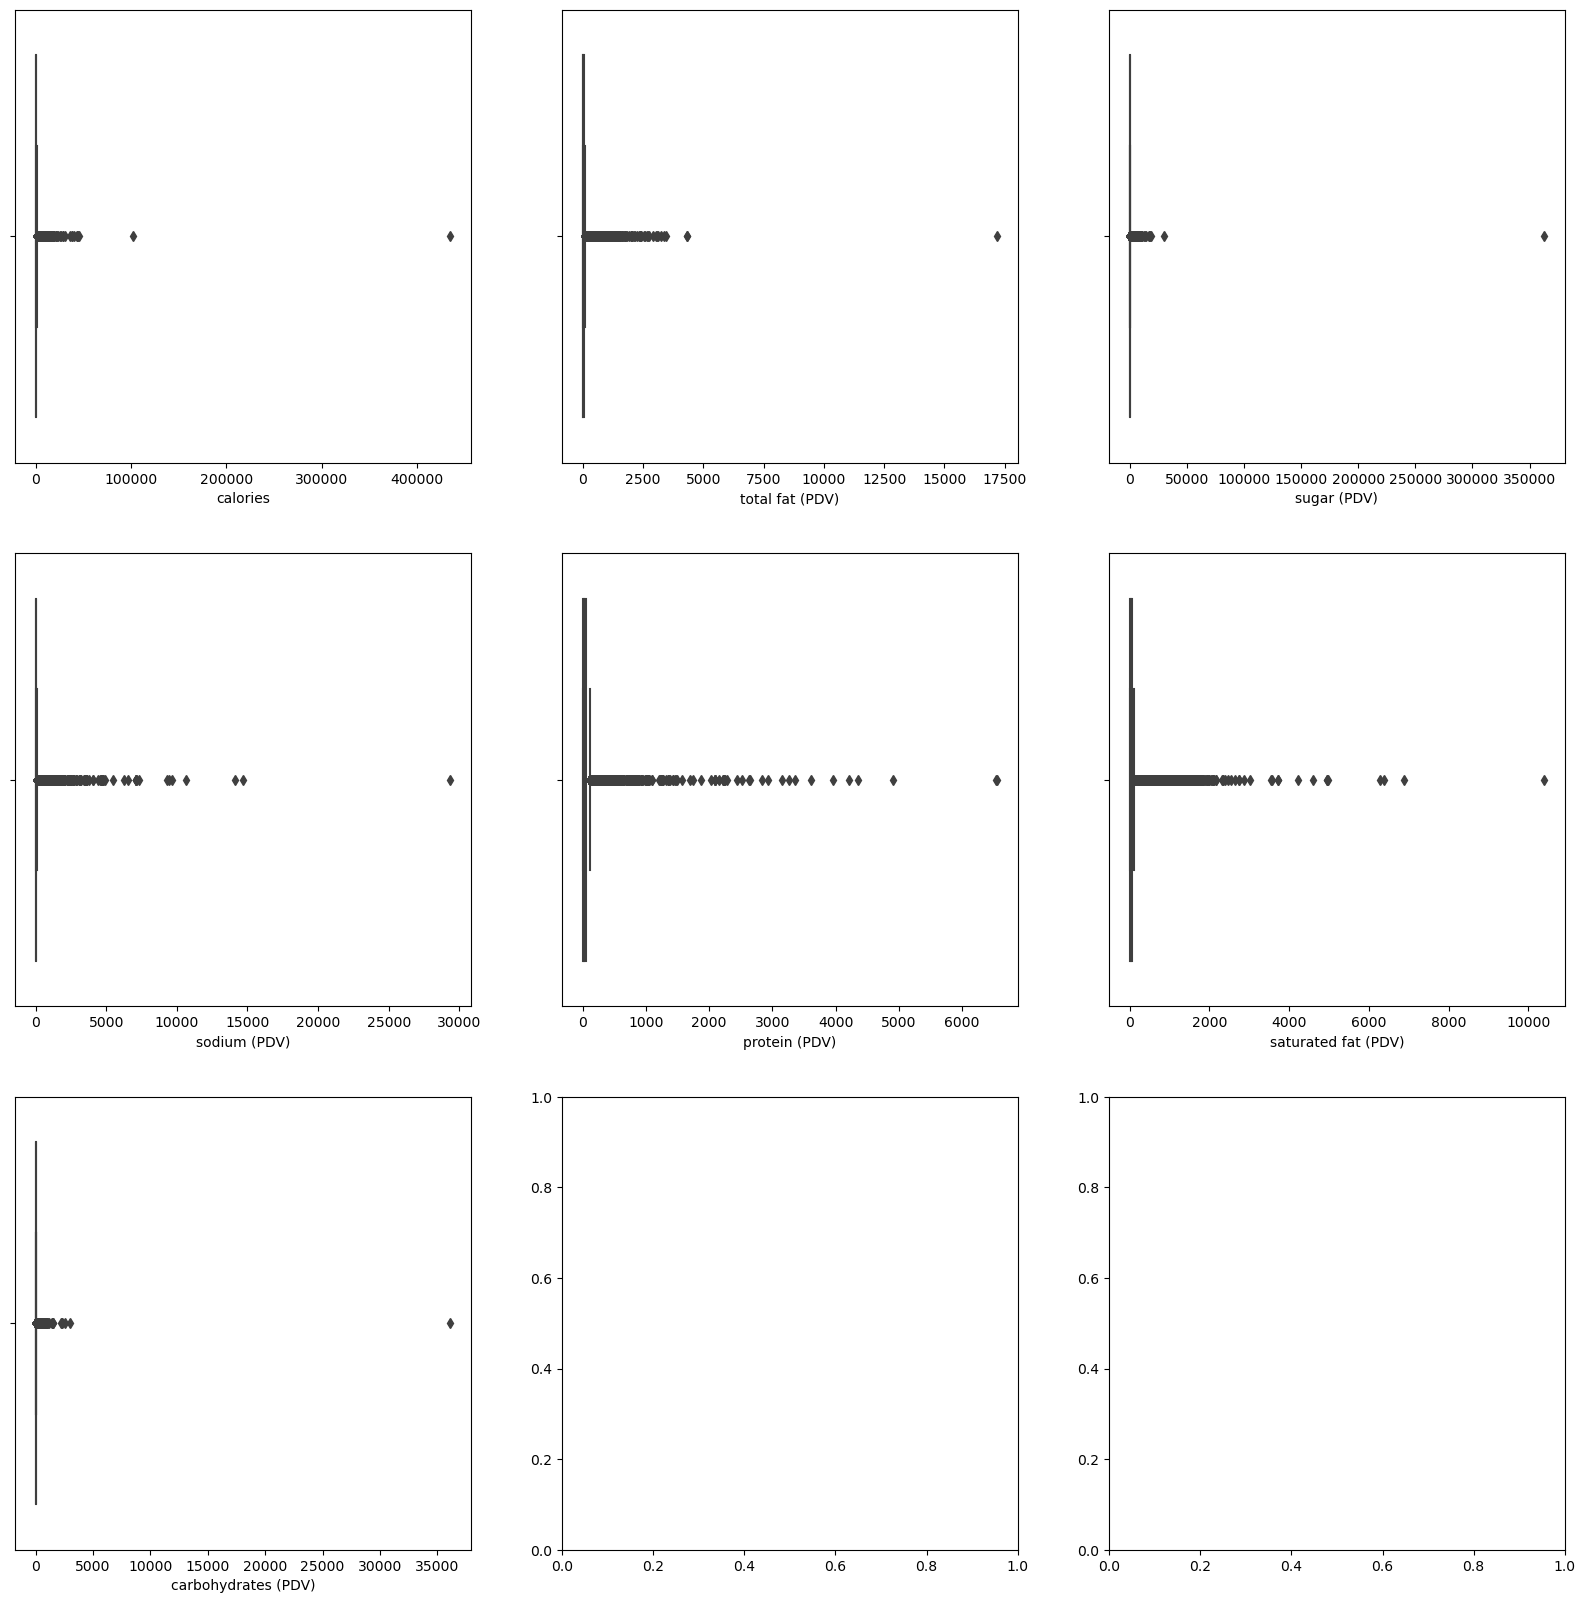

In [ ]:
#plotting to check for outliers
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

cols = ['calories', 'total fat (PDV)', 'sugar (PDV)',
        'sodium (PDV)', 'protein (PDV)', 'saturated fat (PDV)',
        'carbohydrates (PDV)']

for i, col in enumerate(cols):
    sns.boxplot(ax=axes[i//3, i%3], x=recipes_df[col])

In [ ]:
def outlierRemover(df, columns):
    cleaned_df = df.copy()  # Create a copy of the DataFrame to avoid modifying the original data

    for column in columns:
        q25, q75 = np.percentile(cleaned_df[column], [25, 75])
        iqr = q75 - q25
        min_val = q25 - 1.5 * iqr
        max_val = q75 + 1.5 * iqr
        cleaned_df.loc[(cleaned_df[column] < min_val) | (cleaned_df[column] > max_val), column] = np.nan

    return cleaned_df

In [ ]:
#calling the removing outlier function
num_cols = ["calories", 'total fat (PDV)', 'sugar (PDV)', 'sodium (PDV)',
       'protein (PDV)', 'saturated fat (PDV)', 'carbohydrates (PDV)']
recipes_df = outlierRemover(recipes_df, num_cols)

In [ ]:
recipes_df.isnull().sum()

id                         0
name                       0
minutes                    0
nutrition                  0
tags                       0
ingredients                0
steps                      0
calories               15736
total fat (PDV)        16264
sugar (PDV)            23780
sodium (PDV)           15919
protein (PDV)           9141
saturated fat (PDV)    16462
carbohydrates (PDV)    15559
dtype: int64

In [ ]:
recipes_df = recipes_df.dropna()

In [ ]:
recipes_df.isnull().sum()

id                     0
name                   0
minutes                0
nutrition              0
tags                   0
ingredients            0
steps                  0
calories               0
total fat (PDV)        0
sugar (PDV)            0
sodium (PDV)           0
protein (PDV)          0
saturated fat (PDV)    0
carbohydrates (PDV)    0
dtype: int64

In [ ]:
from wordcloud import WordCloud
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

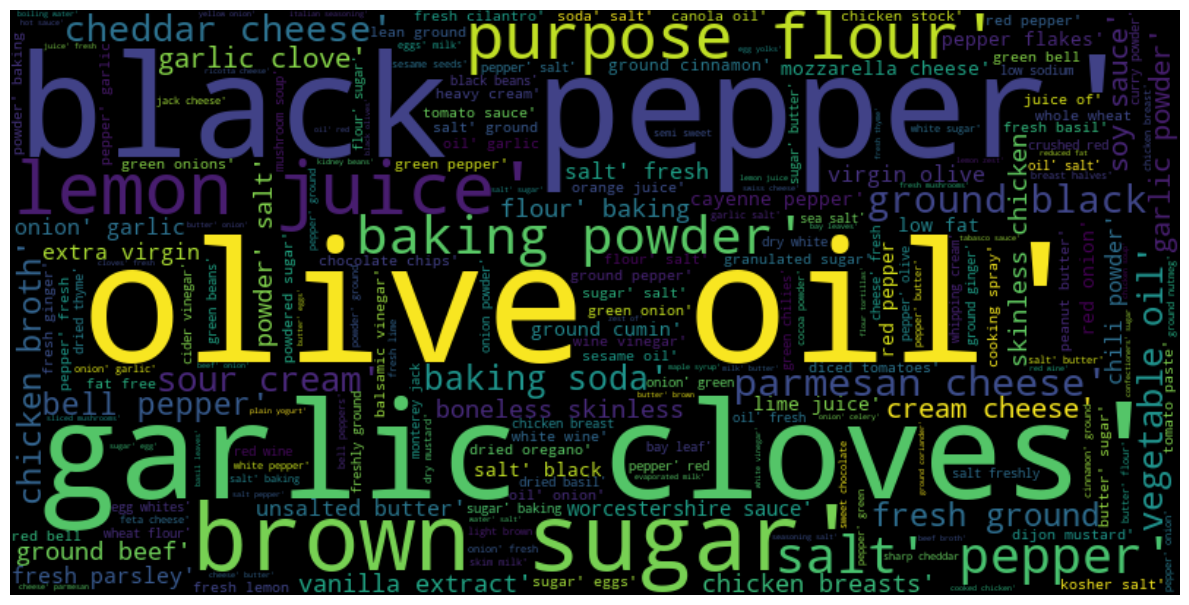

In [ ]:
# Concatenate all ingredients into a single string
all_ingredients = ' '.join(recipes_df['ingredients'])

# Create a word cloud with customized parameters
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='black', colormap='viridis',
                      contour_width=3, contour_color='white').generate(all_ingredients)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


The most commonly used ingredients in the recipes include: black pepper, garlic cloves, Olive oil, brown sugar etc.

### Kenyan Recipe

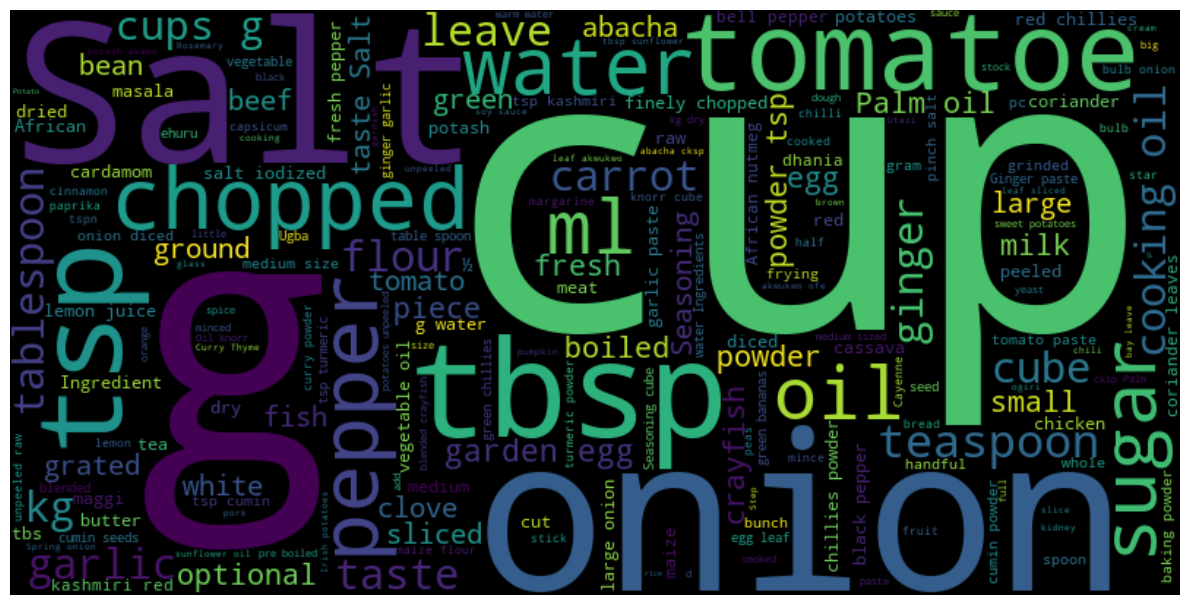

In [ ]:
# Concatenate all ingredients into a single string
all_ingredients = ' '.join(recipe_ke['ingredients'])

# Create a word cloud with customized parameters
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='black', colormap='viridis',
                      contour_width=3, contour_color='white').generate(all_ingredients)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
plt.show()


### Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
recipes_data = scaler.fit_transform(recipes_df.drop(columns=['name','id','minutes','nutrition','tags','ingredients','steps']))
normalized_recipes_df = pd.DataFrame(recipes_data, columns=recipes_df.drop(columns=['name','id','minutes','nutrition','tags','ingredients','steps']).columns)



## Modelling

### Baseline Model

In [ ]:
class CalorieBasedRecommender:

    def __init__(self, df):
        self.df = Nutrition_df

    def recommend(self, target_calories, num_recommendations=5):
        recommendations = [row['name'] for index, row in self.df.iterrows() if row['calories'] <= target_calories]
        sorted_recommendations = sorted(recommendations, key=lambda x: self.df.loc[self.df['name'] == x, 'calories'].values[0])
        return sorted_recommendations[:num_recommendations]

In [ ]:
class CalorieBasedRecommender:

    def __init__(self, df):
        self.df = Nutrition_df

    def recommend(self, target_calories, num_recommendations=5):
        recommendations = []
        for index, row in self.df.iterrows():
            if row['calories'] <= target_calories:
                recommendations.append(row['name'])
            if len(recommendations) == num_recommendations:
                break
        return recommendations

In [ ]:
recommender = CalorieBasedRecommender(Nutrition_df)
target_calories = 1000
num_recommendations = 20

recommendations = recommender.recommend(target_calories, num_recommendations)

In [ ]:
recommendations

['Cornstarch',
 'Nuts, pecans',
 'Eggplant, raw',
 'Teff, uncooked',
 'Sherbet, orange',
 'Cauliflower, raw',
 'Taro leaves, raw',
 'Lamb, raw, ground',
 'Cheese, camembert',
 'Vegetarian fillets',
 'PACE, Picante Sauce',
 'Goji berries, dried',
 'Mango nectar, canned',
 'Crackers, rusk toast',
 'Chicken, boiled, feet',
 'Quail, raw, meat only',
 'Pie, lemon, fried pies',
 'Peppers, raw, jalapeno',
 'Winged bean tuber, raw',
 'Salami, turkey, cooked']